# 1 - Title

**Competition Title** : 

Hacktiv8 Talent Fair 2023

**Project Title** : 

Memprediksi apakah Peminjam mempunyai kemampuan untuk melunasi peminjaman atau tidak

**PROBLEM** : 

Home Credit menargetkan jumlah pelanggan yang lebih besar untuk memungkinkan Home Credit meningkatkan pendapatannya. Namun, semakin banyak pinjaman yang ditawarkan perusahaan, semakin besar pula resiko yang terjadi. Hal ini dikarenakan jika terjadi gagal bayar di antara pelanggan meningkat, maka perusahaan akan mengalami kerugian dalam ekspansinya.

**SOLUTION** : 

Home Credit akan menawarkan pinjaman dengan benar kepada individu yang dapat membayar setiap bulannya dan menolak kepada mereka yang tidak mampu berdasarkan dengan data historical loan application yang ada yang nantinya diharapkan dapat memprediksi dan mengklasifikasi apakah pemohon dapat membayar pinjaman atau tidak.

# 2 - Introduction

- Nama : Novanska Aginta Ganesha
- Batch : FTDS-019-RMT
- Dataset : <https://www.kaggle.com/competitions/home-credit-default-risk/data>

Objective :

1. Memprediksi kemampuan setiap peminjam dengan membuat, memprosess , dan memilih model yang memiliki performa paling optimal

# 3 - Working Space

## 3.1 - Import Libraries

In [102]:
# Library Pengolahan Data
import numpy as np
import pandas as pd

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library Split Test dan Train
from sklearn.model_selection import train_test_split

# Library Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Library Scaling dan Encoding 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Library Model
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


# Library Parameter Tuning
from sklearn.model_selection import GridSearchCV

# Library Evaluasi
from sklearn.metrics import roc_auc_score,accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc,roc_curve

# Library Saving Model
import pickle 

# Library Balancing
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

## 3.2 - Data Loading

In [3]:
df_train = pd.read_csv('application_train.csv')

In [4]:
df_test = pd.read_csv('application_test.csv')

In [5]:
#bureau_balance = pd.read_csv('bureau_balance.csv')
#bureau = pd.read_csv('bureau.csv')
#credit_card_balance = pd.read_csv('credit_card_balance.csv')
#installments_payments = pd.read_csv('installments_payments.csv')
#pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')
#previous_application = pd.read_csv('previous_application.csv')

In [6]:
df_train.shape

(307511, 122)

In [7]:
df_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_train.tail(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [9]:
df_train.duplicated().sum()

0

## 3.3 - Missing Values

In [10]:
missing_values = df_train.isnull().sum()
mis_val_percent = 100 * missing_values / len(df_train)
mis_val_table = pd.concat([missing_values, mis_val_percent], axis=1)
        
# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})

mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

print('Ada sebanyak %d kolom yang memiliki missing values ' % mis_val_table_ren_columns.shape[0])
mis_val_table_ren_columns.head(10)

Ada sebanyak 67 kolom yang memiliki missing values 


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Insight :

Dari data diatas dapat diketahui bahwa ada sebanyak 67 kolom yang memiliki missing values, dan kebanyakan missing values diisi oleh kolom yang berisikan dengan 'MEDI', 'AVG' , dan 'MODE' namun dalam permodelan ini saya akan menggunakan XGBoost yang dimana XGBoost dapat menghandle missing values tanpa perlu di imputasi. Opsi lainnya saya akan mendrop semua kolom yang memiliki lebih dari 50% missing values, namun kita belum tahu apakah kolom tersebut berguna untuk permodelan ini.

Maka dari itu saya **akan keep terlebih dahulu kolom2 tersebut** dan melihat perkembangan selanjutnya.

## 3.4 Exploratory Data Analysis

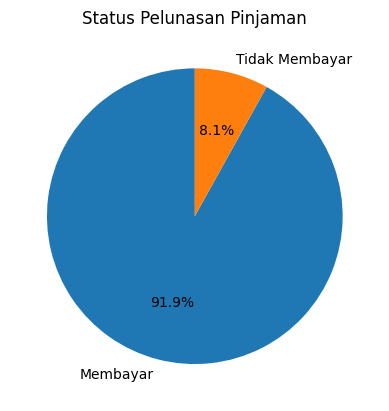

In [11]:
# Check distribusi pada target
target_counts = df_train['TARGET'].value_counts()

# Create figure and axis objects
fig, ax = plt.subplots()

# Create pie chart
labels = ['Membayar', 'Tidak Membayar']
pie = ax.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title
ax.set_title('Status Pelunasan Pinjaman')

# Show chart
plt.show()

Insight : 

Masih terdapat 8.1% Peminjam yang tidak/belum membayar cicilannya, dari data diatas dapat diketahui juga bahwa data tidak balance . Data masih bias terhadap 0 (Membayar)

<Figure size 1000x600 with 0 Axes>

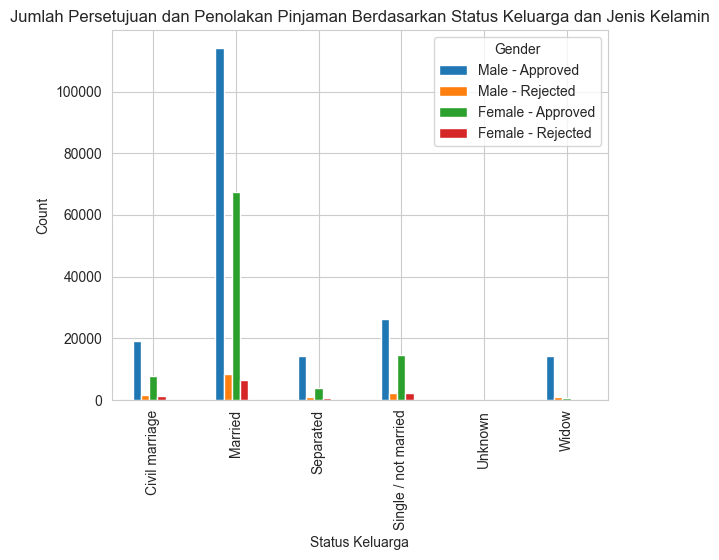

In [12]:
# membuat tabel pivot untuk menghitung jumlah persetujuan dan penolakan pinjaman berdasarkan status keluarga dan jenis kelamin
family_gender = df_train.pivot_table(index=['NAME_FAMILY_STATUS'], 
                                     columns=['CODE_GENDER', 'TARGET'], values='SK_ID_CURR', aggfunc='count')
family_gender.columns = family_gender.columns.map(lambda x: f"{x[0]}_{x[1]}")

# membuat stacked bar chart menggunakan tabel pivot
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = family_gender.plot(kind='bar')
ax.set_xlabel('Status Keluarga')
ax.set_ylabel('Count')
ax.set_title('Jumlah Persetujuan dan Penolakan Pinjaman Berdasarkan Status Keluarga dan Jenis Kelamin')

plt.xticks(rotation=90)
plt.legend(title='Gender', labels=['Male - Approved', 'Male - Rejected', 'Female - Approved', 'Female - Rejected'])
plt.show()

Insight :

Kebanyakan pinjaman yang disetujui adalah laki-laki yang sudah menikah maupun perempuan yang sudah menikah (tingkat peminjaman tinggi pada orang yang sudah menikah)

In [13]:
# check anomali pada data (angka salah ketik, kesalahan dalam pengukuran , dan pengukuran yang ekstrem)
# (df_train['DAYS_BIRTH'] / -365).describe() tidak ada kesalahan.
(df_train['DAYS_EMPLOYED'] / -365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

masih ada angka yang tidak masuk akal seperti - 1000 dan nilai tengah -174

DAYS_EMPLOYED = Berapa hari sebelum lamaran orang tersebut mulai bekerja saat ini, waktu hanya relatif terhadap lamaran

10       365243
17       365243
22       365243
26       365243
36       365243
          ...  
48717    365243
48728    365243
48731    365243
48735    365243
48736    365243
Name: DAYS_EMPLOYED, Length: 9274, dtype: int64

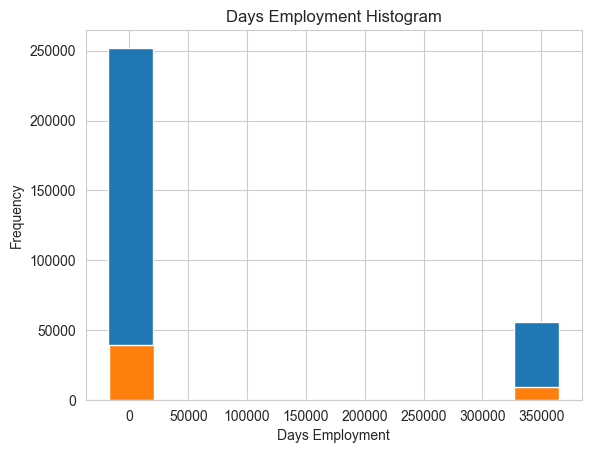

In [14]:
df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
df_test['DAYS_EMPLOYED'].plot.hist()
plt.xlabel('Days Employment')

df_test['DAYS_EMPLOYED'][df_test['DAYS_EMPLOYED'] > 200000]

Ada sebanyak 9274 anomali pada test data dengan  48744 entries



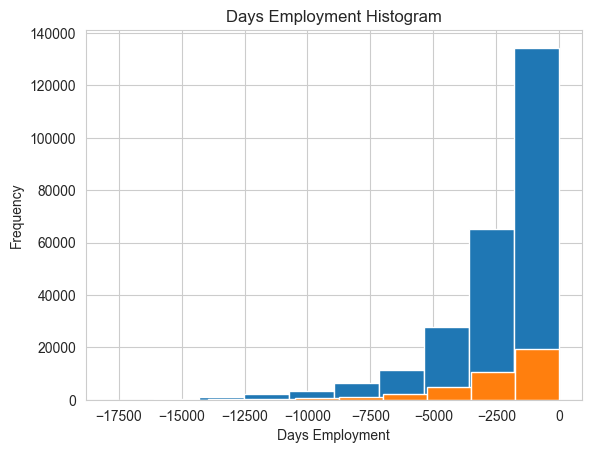

In [15]:
# Create an anomalous flag column
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243
df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
df_test['DAYS_EMPLOYED'].plot.hist()
plt.xlabel('Days Employment')

print('Ada sebanyak %d anomali pada test data dengan  %d entries\n' % (df_test["DAYS_EMPLOYED_ANOM"].sum(), len(df_test)))

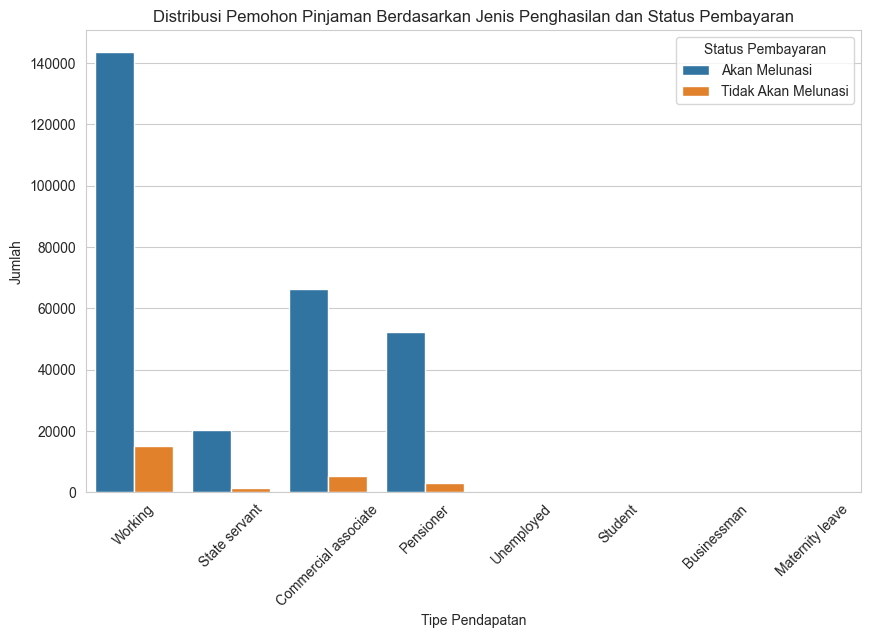

In [16]:
# membuat barplot yang menunjukkan distribusi pemohon pinjaman berdasarkan jenis pendapatan mereka
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=df_train)
ax.set_xlabel('Tipe Pendapatan')
ax.set_ylabel('Jumlah')
ax.set_title('Distribusi Pemohon Pinjaman Berdasarkan Jenis Penghasilan dan Status Pembayaran')
plt.xticks(rotation=45)

plt.legend(title='Status Pembayaran', labels=['Akan Melunasi', 'Tidak Akan Melunasi'])
plt.show()

Insight : 

Terdapat null value pada tipe pendapatan unemployed, student, businessman, Maternity leave dan untuk tipe pendapatan dengan status bekerja kebanyakan akan melakukan pembayaran.

In [17]:
df_train['CNT_CHILDREN'].unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14],
      dtype=int64)

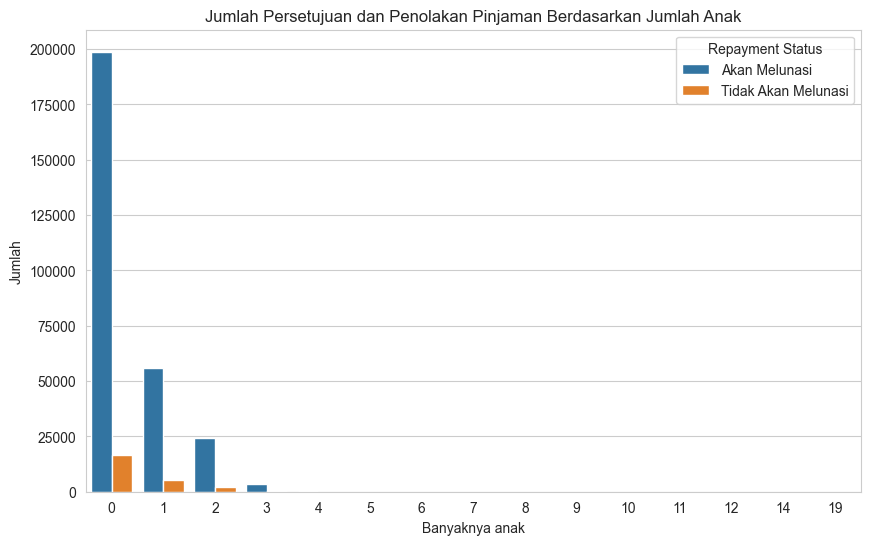

In [18]:
# Jumlah Persetujuan dan Penolakan Pinjaman Berdasarkan Jumlah Anak
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CNT_CHILDREN', hue='TARGET', data=df_train)
ax.set_xlabel('Banyaknya anak')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Persetujuan dan Penolakan Pinjaman Berdasarkan Jumlah Anak')
plt.legend(title='Repayment Status', labels=['Akan Melunasi', 'Tidak Akan Melunasi'])
plt.show()

Insight : 

Kebanyakan peminjam yang di setujui memiliki 0-3 anak dan kebanyakan peminjam tidak memiliki anak

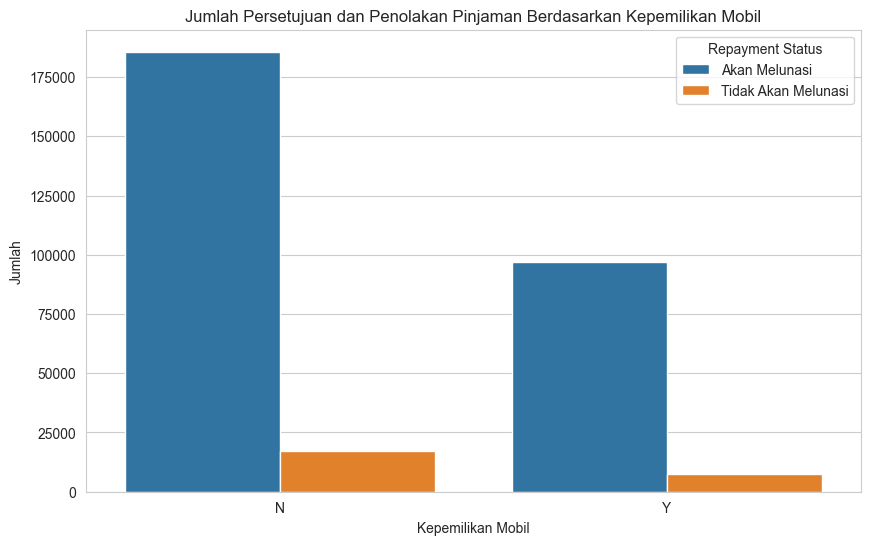

In [19]:
# membuat barplot yang menunjukkan jumlah persetujuan dan penolakan pinjaman berdasarkan jumlah mobil yang dimiliki
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=df_train)
ax.set_xlabel('Kepemilikan Mobil')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Persetujuan dan Penolakan Pinjaman Berdasarkan Kepemilikan Mobil')
plt.legend(title='Repayment Status', labels=['Akan Melunasi', 'Tidak Akan Melunasi'])
plt.show()

Insight : 

Rata-rata peminjam tidak memiliki mobil dan kebanyakan akan melakukan pembayaran

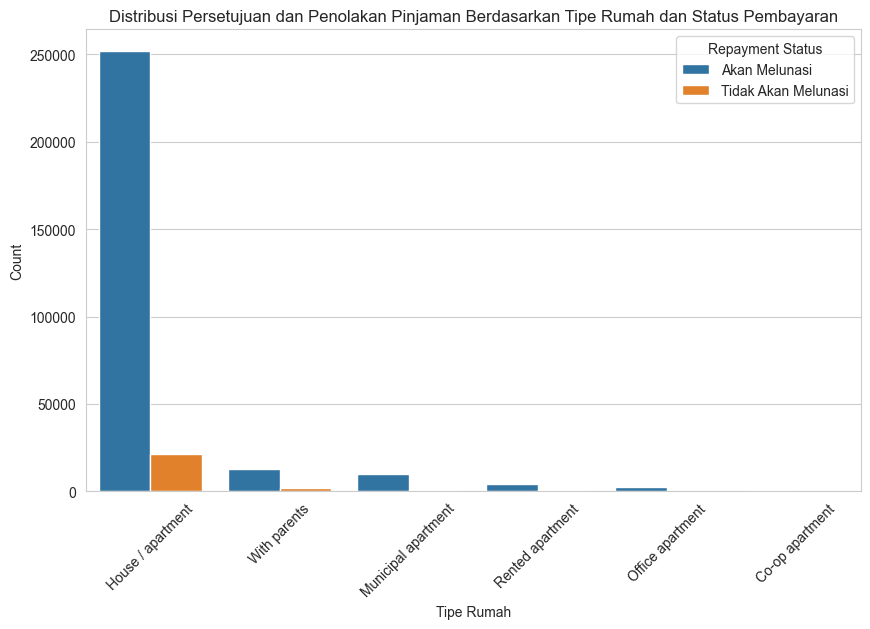

In [20]:
# Plot distribusi persetujuan dan penolakan pinjaman berdasarkan tipe rumah dan status pembayaran
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=df_train,order=df_train['NAME_HOUSING_TYPE'].value_counts().index)
ax.set_xlabel('Tipe Rumah')
ax.set_ylabel('Count')
ax.set_title('Distribusi Persetujuan dan Penolakan Pinjaman Berdasarkan Tipe Rumah dan Status Pembayaran')
plt.xticks(rotation=45)
plt.legend(title='Repayment Status', labels=['Akan Melunasi', 'Tidak Akan Melunasi'])
plt.show()

Insight :

Kebanyakan peminjam tinggal di rumah atau apartement, dan seluruh peminjam yang tinggal di *Municipal apartment* akan membayar

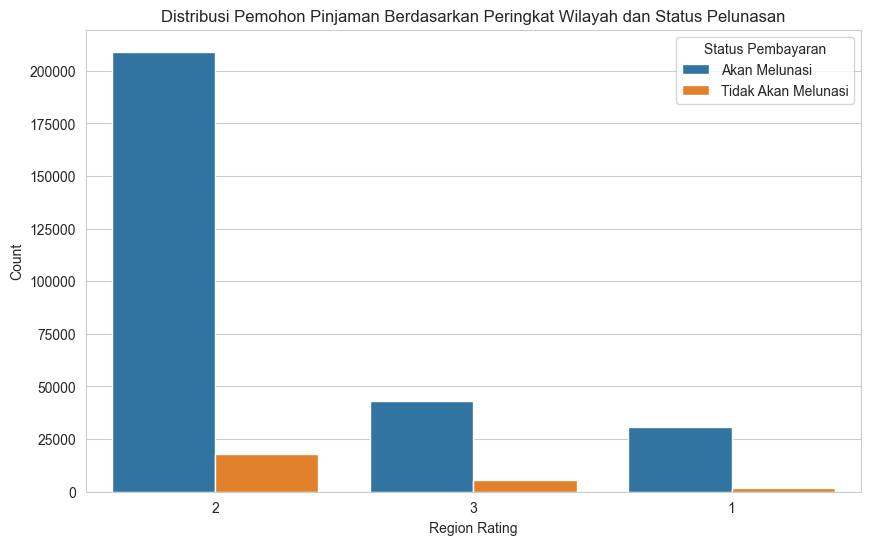

In [21]:
# membuat plot yang menunjukkan jumlah pemohon pinjaman berdasarkan peringkat wilayah dan status pembayaran
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='REGION_RATING_CLIENT', hue='TARGET', data=df_train,order=df_train['REGION_RATING_CLIENT'].value_counts().index)
ax.set_xlabel('Region Rating')
ax.set_ylabel('Count')
ax.set_title('Distribusi Pemohon Pinjaman Berdasarkan Peringkat Wilayah dan Status Pelunasan')

# change legend labels
plt.legend(title='Status Pembayaran', labels=['Akan Melunasi', 'Tidak Akan Melunasi'])
plt.show()

Insight : 

Wilayah dengan nilai rating 2 merupakan wilayah dengan jumlah peminjam terbanyak dibanding wilayah yang lain.

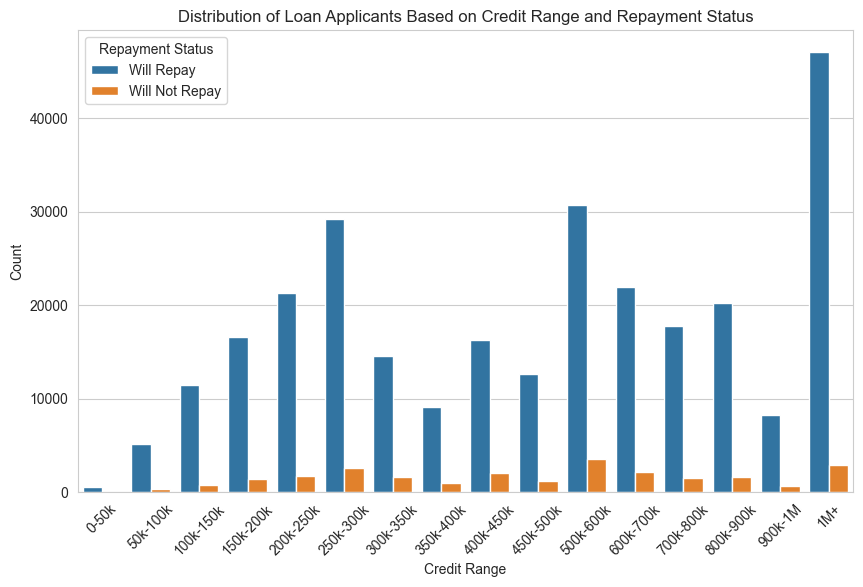

In [22]:
credit_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 600000, 700000, 800000, 900000, 1000000, np.inf]
credit_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1M', '1M+']
df_train['CREDIT_RANGE'] = pd.cut(df_train['AMT_CREDIT'], bins=credit_bins, labels=credit_labels)
# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CREDIT_RANGE', hue='TARGET', data=df_train, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Credit Range')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Credit Range and Repayment Status')
plt.xticks(rotation=45)

# Change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

**Bureau**

In [23]:
bureau = pd.read_csv('bureau.csv')

In [24]:
print('Jumlah baris dan kolom : ',bureau.shape)
bureau.head(5)

Jumlah baris dan kolom :  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [25]:
bureau.tail(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN
1716427,246829,5057778,Closed,currency 1,-463,0,NaN,-387.0,NaN,0,22500.00,0.0,NaN,0.0,Microloan,-387,NaN


In [26]:
bureau.nunique()

SK_ID_CURR                 305811
SK_ID_BUREAU              1716428
CREDIT_ACTIVE                   4
CREDIT_CURRENCY                 4
DAYS_CREDIT                  2923
CREDIT_DAY_OVERDUE            942
DAYS_CREDIT_ENDDATE         14096
DAYS_ENDDATE_FACT            2917
AMT_CREDIT_MAX_OVERDUE      68251
CNT_CREDIT_PROLONG             10
AMT_CREDIT_SUM             236708
AMT_CREDIT_SUM_DEBT        226537
AMT_CREDIT_SUM_LIMIT        51726
AMT_CREDIT_SUM_OVERDUE       1616
CREDIT_TYPE                    15
DAYS_CREDIT_UPDATE           2982
AMT_ANNUITY                 40321
dtype: int64

Features : 

- SK_ID_CURR : Id dari application_train
- SK_ID_BUREAU : Id dari bureau_balance
- CREDIT_ACTIVE : Status keaktifan debitur
- CREDIT_CURRENCY : Catatan mata uang
- DAYS_CREDIT : Pengajuan jangka waktu kredit dalam hari
- CREDIT_DAY_OVERDUE : Jumlah hari yang melebihi tempo
- DAYS_CREDIT_ENDDATE : Sisa durasi kredit saat pengajuan di Home Kredit dalam hari
- DAYS_ENDDATE_FACT : Hari sejak kredit Biro Kredit berakhir saat pengajuan di Home Kredit
- AMT_CREDIT_MAX_OVERDUE : Jumlah maksimum tunggakan di Biro Kredit
- CNT_CREDIT_PROLONG : Berapa kali kredit Biro Kredit di perpanjang
- AMT_CREDIT_SUM : Jumlah kredit saat ini di Biro Kredit
- AMT_CREDIT_SUM_DEBT : Jumlah hutang saat ini di Biro Kredit
- AMT_CREDIT_SUM_LIMIT : Batas kredit di kartu kredit saat ini di Biro Kredit
- AMT_CREDIT_SUM_OVERDUE : Jumlah tunggakan saat ini di Biro Kredit
- CREDIT_TYPE : Jenis kredit di Biro Kredit (mobil, uang tunai, dll)
- DAYS_CREDIT_UPDATE : Informasi terbaru yang datang dari Biro Kredit (dalam hari)
- AMT_ANNUITY : Jumlah pembayaran tetap kredit di setiap pembayaran

In [27]:
bureau.duplicated().sum()

0

In [28]:
null_count = bureau.isnull().sum() # jumlah missing value
null_percent = bureau.isnull().mean() # presentase missing value
null_df = pd.concat([null_count, null_percent], axis=1, keys=['Missing Values', '% Missing Values'])
null_df

,Missing Values,% Missing Values
SK_ID_CURR,0,0.000000
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000
DAYS_CREDIT_ENDDATE,105553,0.061496
DAYS_ENDDATE_FACT,633653,0.369170
AMT_CREDIT_MAX_OVERDUE,1124488,0.655133
CNT_CREDIT_PROLONG,0,0.000000


dari data diatas dapat diketahui bahwa ada dua kolom yang memiliki lebih dari 50% missing value yaitu AMT_CREDIT_MAX_OVERDUE dan AMT_ANNUITY karena missing value terlalu besar, maka saya akan melakukan drop terhadap dua kolom tersebut.

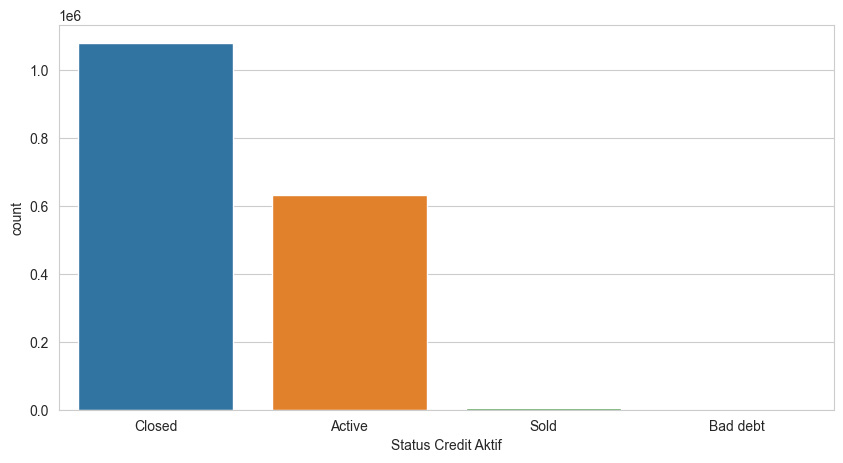

In [29]:
#check distribusi terhadap CREDIT_ACTIVE
plt.figure(figsize=(10,5))
ax = sns.countplot(x='CREDIT_ACTIVE',data=bureau)
ax.set_xlabel('Status Credit Aktif')
plt.show()

Insight :

Terliihat bahwa sudah banyak peminjam yang sudah menutup keaktifan kreditnya, dan beberapa masih active

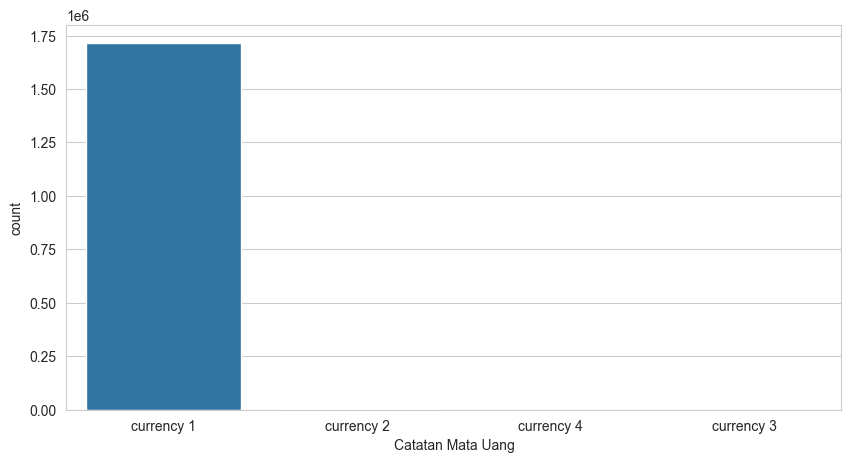

In [30]:
# check distribusi terhadap mata uang (CREDIT_CURRENCY)
plt.figure(figsize=(10,5))
ax = sns.countplot(x='CREDIT_CURRENCY',data=bureau)
ax.set_xlabel('Catatan Mata Uang')
plt.show()

Insight :

Hampir keseluruhan dari catatan menggunakan currency 1

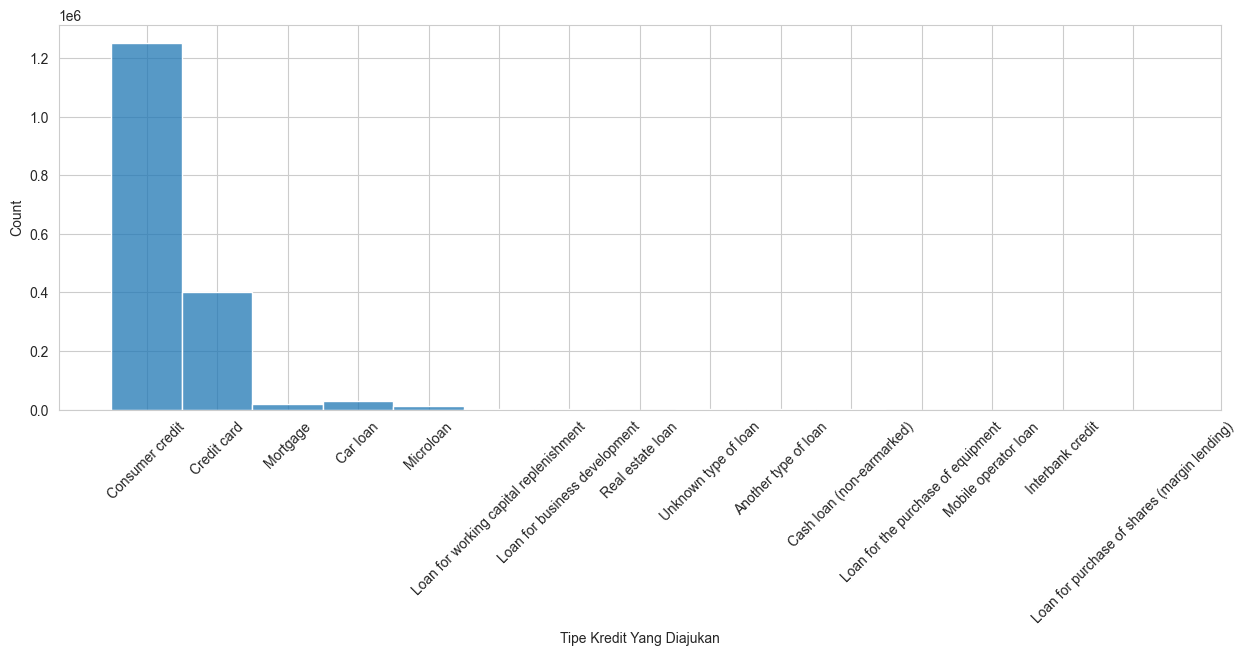

In [31]:
# check tipe kredit yang diajukan kepada kreditur
plt.figure(figsize=(15,5))
ax = sns.histplot(x='CREDIT_TYPE',data=bureau)
ax.set_xlabel('Tipe Kredit Yang Diajukan')
plt.xticks(rotation=45)
plt.show()

Insight :

kebanyakan peminjam melakukan kredit untuk pemakaian pribadi, ada juga yang melakukan dengan credit card.

## 3.4 Feature Engineering

### Label Encoding dan OneHotEncoding

pada data akan saya lakukan Label Encoding dan One hot encoding, namun saya akan memilah terlebih dahulu mana yang lebih baik menggunakan label encoding dan mana yang lebih baik menggunakan one hot

pertama akan dilakukan pengecekan unique values pada kolom yang bertipe object

In [32]:
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Bisa dilihat bahwa ada banyak kolom kategori yang memiliki <= 2 unique values pada tipe object, maka dari itu setiap kolom yang memiliki <= 2 unique values akan saya lakukan Label Encoding

Label encoding adalah mengganti setiap kolom yang berisi n unique values menjadi numerical

Contoh : 

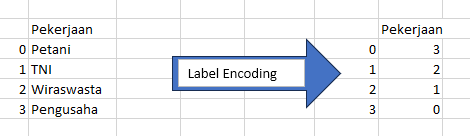

Sedangkan one hot encoding membuat sebuah kolom baru dengan n unique values yang dipunya

Contoh :

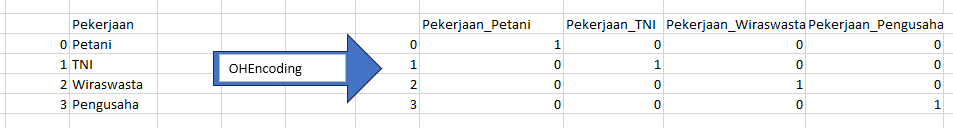

Pada Label Encoding sama akan menggunakan LabelEncoder dari scikit-learn, dan untuk OneHotEncoding akan digunakan pd.get_dummies

In [33]:
# LabelEncoding
le = LabelEncoder()
label_encoding = 0
for col in df_train:
    if df_train[col].dtype == 'object':
        if len(list(df_train[col].unique())) <= 2:
            # Train pada data train
            le.fit(df_train[col])
            # Transform keduanya di train dan test
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])
            
            # menghitung banyaknya kolom yang dilakukan label encoder
            label_encoding += 1
            

print('Banyaknya kolom yang dilakukan lebel encoder adalah : ',label_encoding)          
            

Banyaknya kolom yang dilakukan lebel encoder adalah :  3


In [34]:
# OneHotEncoding

df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [35]:
print('Jumlah kolom dan baris pada Train',df_train.shape)
print('Jumlah kolom dan baris pada Test',df_test.shape)

Jumlah kolom dan baris pada Train (307511, 260)
Jumlah kolom dan baris pada Test (48744, 240)


Jumlah features pada train data tidaklah sama dengan jumlah features pada test data, maka dari itu saya akan menyamakan setiap features yang ada pada train dan test agar model dapat berjalan dengan lancar.

In [36]:
# lock target agar tidak hilang
train_labels = df_train['TARGET']

# Menyamakan jumlah features pada train dan test data dan hanya mengambil nama kolomnya saja.
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)

# memasukkan target kembali
df_train['TARGET'] = train_labels

In [37]:
print('Jumlah kolom dan baris pada Train',df_train.shape)
print('Jumlah kolom dan baris pada Test',df_test.shape)

Jumlah kolom dan baris pada Train (307511, 241)
Jumlah kolom dan baris pada Test (48744, 240)


Jumlah features pada train dan test sudah sama maka dapat dilakukan permodelan.

## Split train-set dan test-set pada app train

In [59]:
X = df_train.loc[:,:'EMERGENCYSTATE_MODE_Yes']
y = df_train.loc[:,'TARGET']

In [39]:
X.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,1,0,0,0,0,0,0,1,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#split train-test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### Handling Missing Values

Pada bagian ini saya akan menghandle missing value dan scaling lalu melakukan SMOTE pada data y_train untuk menghandle imbalance pada data

In [63]:
#Simple Imputer untuk menghandle missing values pada data train
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

pada simple imputer saya menggunakan strategy **median** karena pada EDA terlihat bahwa data kebanyakan skewed.

In [64]:
# Scaling pada data dengan range 0 - 1
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# Smote pada data train untuk menghindari imbalanced pada data.
smote = SMOTE(random_state = 101)
X_train, y_train = smote.fit_resample(X_train, y_train)
Counter(y_train)

Counter({0: 226148, 1: 226148})

## Model Definition

pada permodelan ini akan digunakan LogisticRegression ,RandomForest , dan XGBoost untuk melihat perbandingan model terbaik

1. **LogisticRegression** dipilih karena model ini digunakan untuk masalah klasifikasi biner, tetapi model ini memiliki kekurangan yaitu sensitif terhadap outlier.

2. **RandomForest** dipilih karena model ini terdiri dari DecisionTree . Kelebihan pada model ini yaitu model ini dapat menyaring fitur penting dengan bawaan dari model sendiri yaitu feature importance, dan juga model ini tahan terhadap outlier

3. **XGBoost** dipilih karena model ini juga berasal dari DecisionTree. Kelebihan pada model ini yaitu kemampuannya untuk menangani data yang hilang dan kumpulan data yang besar secara efisien. XGBoost juga memiliki sejumlah hiperparameter yang dapat disetel untuk meningkatkan performa model, termasuk *learning rate, depth of trees, dan parameter regularisasi.*

### Logistic Regression

In [66]:
logreg = LogisticRegression(max_iter=1000) #menggunakan max iterasi sebesar 1000 kali.

logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [86]:
logreg_pred = logreg.predict(X_train)
logreg_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [90]:
logreg_pred_test = logreg.predict(X_test)

In [95]:
print('---------------------LOGREG TRAIN---------------------')
print(classification_report(y_train,logreg_pred))

score = logreg.score(X_train,y_train)
print('Score LogisticRegression : ',score)

---------------------LOGREG TRAIN---------------------
              precision    recall  f1-score   support

           0       0.71      0.70      0.71    226148
           1       0.71      0.72      0.71    226148

    accuracy                           0.71    452296
   macro avg       0.71      0.71      0.71    452296
weighted avg       0.71      0.71      0.71    452296

Score LogisticRegression :  0.7095552470063852


In [94]:
print('---------------------LOGREG TEST---------------------')
print(classification_report(y_test,logreg_pred_test))

score = logreg.score(X_test,y_test)
print('Score LogisticRegression : ',score)

---------------------LOGREG TEST---------------------
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     56538
           1       0.16      0.64      0.26      4965

    accuracy                           0.70     61503
   macro avg       0.56      0.67      0.53     61503
weighted avg       0.89      0.70      0.77     61503

Score LogisticRegression :  0.6997870022600523


In [104]:
# membuat data frame untuk hasil FPR dan TPR
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
print('AUC Score : ', auc_logreg)
fpr_tpr = pd.DataFrame({'FPR': fpr_logreg, 'TPR': tpr_logreg})
fpr_tpr.head(10)

AUC Score :  0.7335502751814258


,FPR,TPR
0,0.000000,0.000000
1,0.000018,0.000000
2,0.000018,0.000201
3,0.000035,0.000201
4,0.000035,0.000403
5,0.000071,0.000403
6,0.000071,0.000604
7,0.000088,0.000604
8,0.000088,0.001208
9,0.000106,0.001208


Jika dilihat dari classification report pada y_test masih terlihat bahwa model ini masih terlalu bias terhadap 0 dan masih banyak misclasifikasi pada 1 , model ini memiliki nilai AUC 0.73 dan juga cenderung baik dalam memprediksi 0 (melunaskan pembayaran) sedangkan masih kurang dalam memprediksi 1 (telat membayar)

### Random Forest

In [81]:
rf = RandomForestClassifier(random_state=11,criterion='gini')
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=11)

In [82]:
rf_pred = rf.predict(X_train)
rf_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [89]:
rf_pred_test = rf.predict(X_test)

In [106]:
print('---------------------RF TRAIN---------------------')
print(classification_report(y_train,rf_pred))

score = rf.score(X_train,y_train)
print('Score RF Train : ',score)

print('---------------------RF TEST---------------------')
print(classification_report(y_test,rf_pred_test))

score = rf.score(X_test,y_test)
print('Score RF Test : ',score)

---------------------RF TRAIN---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226148
           1       1.00      1.00      1.00    226148

    accuracy                           1.00    452296
   macro avg       1.00      1.00      1.00    452296
weighted avg       1.00      1.00      1.00    452296

Score RF Train :  1.0
---------------------RF TEST---------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.28      0.01      0.03      4965

    accuracy                           0.92     61503
   macro avg       0.60      0.51      0.49     61503
weighted avg       0.87      0.92      0.88     61503

Score RF Test :  0.917516218721038


In [105]:
# membuat data frame untuk hasil FPR dan TPR
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_logreg)
print('AUC Score : ', auc_rf)
fpr_tpr = pd.DataFrame({'FPR': fpr_rf, 'TPR': tpr_rf})
fpr_tpr.head(10)

AUC Score :  0.7335502751814258


,FPR,TPR
0,0.000000,0.000000
1,0.000018,0.000000
2,0.000018,0.000201
3,0.000053,0.000201
4,0.000071,0.000201
5,0.000088,0.000403
6,0.000141,0.000403
7,0.000177,0.000604
8,0.000248,0.001007
9,0.000354,0.001007


Jika dilihat dari classification report pada y_test masih terlihat bahwa model ini masih terlalu bias terhadap 0 dan masih banyak misclasifikasi pada 1 , model ini memiliki nilai AUC 0.73 dan juga cenderung baik dalam memprediksi 0 (melunaskan pembayaran) sedangkan masih kurang dalam memprediksi 1 (telat membayar)

Namun jika melihat dari classification report pada y_train model ini sangatlah baik dalam memprediksi 0 maupun 1 dikarenakan sebelumnya saya melakukan SMOTE pada y_train(balancing)

### XGBoost

In [99]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [100]:
xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_test)

In [111]:
print('---------------------XGB TRAIN---------------------')
print(classification_report(y_train,xgb_pred_train))

score = xgb.score(X_train,y_train)
print('Score XGB Train : ',score)

print('---------------------XGB TEST---------------------')
print(classification_report(y_test,xgb_pred_test))

score = xgb.score(X_test,y_test)
print('Score XGB Test : ',score)

---------------------XGB TRAIN---------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226148
           1       1.00      0.92      0.96    226148

    accuracy                           0.96    452296
   macro avg       0.96      0.96      0.96    452296
weighted avg       0.96      0.96      0.96    452296

Score XGB Train :  0.9576361497780215
---------------------XGB TEST---------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.44      0.03      0.06      4965

    accuracy                           0.92     61503
   macro avg       0.68      0.52      0.51     61503
weighted avg       0.88      0.92      0.89     61503

Score XGB Test :  0.9184430027803522


In [103]:
# membuat data frame untuk hasil FPR dan TPR
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print('AUC Score : ', auc_xgb)
fpr_tpr = pd.DataFrame({'FPR': fpr_xgb, 'TPR': tpr_xgb})
fpr_tpr.head(10)

AUC Score :  0.7395828210184866


,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.000201
2,0.000000,0.000604
3,0.000018,0.000604
4,0.000018,0.001007
5,0.000088,0.001007
6,0.000088,0.002820
7,0.000106,0.002820
8,0.000106,0.003021
9,0.000124,0.003021


Jika dilihat dari classification report pada y_test masih terlihat bahwa model ini masih terlalu bias terhadap 0 dan masih banyak misclasifikasi pada 1 , model ini memiliki nilai AUC 0.739 dan juga cenderung baik dalam memprediksi 0 (melunaskan pembayaran) sedangkan masih kurang dalam memprediksi 1 (telat membayar)

Namun jika melihat dari classification report pada y_train model ini sangatlah baik dalam memprediksi 0 maupun 1 dikarenakan sebelumnya saya melakukan SMOTE pada y_train(balancing)

## Model Evaluation

Pada permodelan kali ini saya lebih cenderung melihat metrics ROC-AUC untuk melihat performa setiap model karena ROC AUC (Area Under the Receiver Operating Characteristic Curve) adalah metrik evaluasi yang digunakan untuk mengukur kinerja model klasifikasi, metrik ini memberikan gambaran tentang sejauh mana model mampu membedakan kelas-kelas yang berbeda.

Perbandingan AUC Score pada 3 model :

In [107]:
print('AUC Logistic Regression:', auc_logreg)
print('AUC Random Forest:', auc_rf)
print('AUC XGBoost:', auc_xgb)

AUC Logistic Regression: 0.7335502751814258
AUC Random Forest: 0.7335502751814258
AUC XGBoost: 0.7395828210184866


Dapat terlihat bahwa model XGBoost memiliki AUC tertinggi dibandingkan dengan 2 model lainnya , walaupun perbedaan tidak terlalu signifikan. Namun dapat disimpulkan bahwa model XGBoost merupakan model terbaik dalam permodelan ini.


In [110]:
score = logreg.score(X_test,y_test)
print('Score LogisticRegression : ',score)
score = rf.score(X_test,y_test)
print('Score RF Test : ',score)
score = xgb.score(X_test,y_test)
print('Score XGB Test : ',score)


Score LogisticRegression :  0.6997870022600523
Score RF Test :  0.917516218721038
Score XGB Test :  0.9184430027803522


jika meninjau dari score ( accuracy ) XGBoost juga memiliki tingkat score yang lebih tinggi dibandingkan 2 model lainnya, walaupun memang tidak terlalu jauh dengan RandomForest , namun ini semakin membuktikan bahwa XGBoost merupakan model terbaik dibandingkan dengan 2 model lainnya.

In [112]:
print('---------------------XGB TEST---------------------')
print(classification_report(y_test,xgb_pred_test))


---------------------XGB TEST---------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.44      0.03      0.06      4965

    accuracy                           0.92     61503
   macro avg       0.68      0.52      0.51     61503
weighted avg       0.88      0.92      0.89     61503



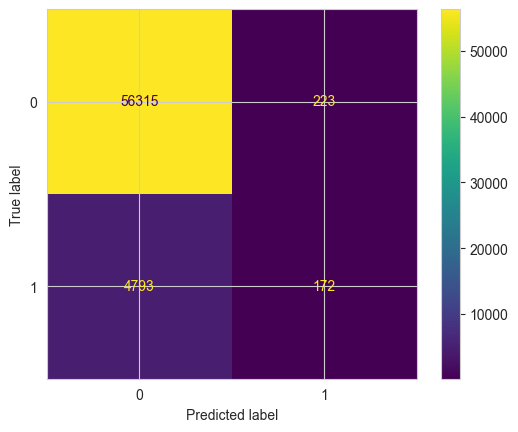

In [113]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
sns.set_style({'axes.grid': False})

Insight :

Dari confussion matrix diatas maka bisa disimpulkan 

1. Dari total 56538 debitur terlihat bahwa ada 223 debitur yang terprediksi gagal bayar
2. Dari total 4865 debitur terlihat bahwa ada 172 debitur yang terprediksi sesuai (gagal bayar)

Maka dari itu ini adalah hal yang sangat fatal dan sangat merugi, dan ini akan menjadi kerugian yang sangat besar bagi perusahaan namun jika dilihat dari nilai AUC 73% model ini juga tidak terlalu parah dalam memprediksi lainnya.

Jika kita ingin memprediksi apakah debitur akan membayar model ini juga sangat baik dalam memprediksi hal tersebut dikarenakan nilai dari **f1score** yang sangat tinggi yaitu 96% , namun sangat disayangkan model ini sangatlah buruk dalam memprediksi debitur yang gagal bayar karena nilai recall yang sangat rendah yaitu 3%

## Model Saving

In [115]:
# menyimpan model
with open('XGBoost.pkl', 'wb') as file_1:
  pickle.dump(xgb, file_1)


## Model Inference

Pada model inference ini saya akan menguji menggunakan application_test atau df_test

In [116]:
# membuka model
with open('XGBoost.pkl', 'rb') as file_1:
  xgb_inf = pickle.load(file_1)

In [125]:
y_inf_pred = xgb_inf.predict(df_test)

In [126]:
df_test['TARGET'] = y_inf_pred

In [128]:
df_test['TARGET'].value_counts()

0    33188
1    15556
Name: TARGET, dtype: int64

dari data test tersebut diprediksi akan ada  33188 debitur yang akan membayar dan 15556 debitur yang telat membayar.

## Conclussion

Sesuai dengan objective yang saya paparkan diatas, pada projek kali ini telah di modeling untuk memprediksi apakah debitur sanggup membayar atau tidak.

Berikut adalah beberapa hasil EDA dan modeling pada projek kali ini :

Berdasarkan **EDA** :

1. Berdasarkan data train masih ada sekitar 8.1% Debitur yang belum membayar cicilannya
2. Kebanyakan pinjaman yang disetujui adalah orang yang sudah bekerja , sudah menikah , memiliki 0 - 3 anak , tidak memiliki mobil dan tinggal di rumah atau apartment
3. Wilayah dengan nilai rating 2 merupakan wilayah dengan jumlah peminjam terbanyak


Berdasarkan **Model Analysis**:

1. Model terlalu imbalanced (terlalu bias terhadap 0(membayar cicilan)) maka dari itu dilakukan SMOTE pada data y_train agar disaat fit model menggunakan data yang sudah tidak bias.
2. Pada data y_test terlalu banyak terjadinya misklasifikasi pada class 1 yang terdeteksi 0.
3. Model XGBoost merupakan model dengan performa terbaik karena nilai score maupun AUCnya lebih tinggi dibandingkan model yang lainnya. 
4. Hasil Evaluasi menunjukkan sangat ketidak seimbangan pada class 0 dan class 1, didapatkan bahwa dari total 4865 debitur yang gagal bayar hanya ada 172 debitur yang terprediksi sesuai (gagal bayar)
5. Model sangat baik dalam memprediksi class 0 .

**For further improvement** : 

1. Dapat menyaring fitur-fitur yang lebih relevan (tidak menggunakan semua feature) seperti menggunakan RandomForest Feature Selection, dan juga dilakukan modeling dengan model yang digunakan untuk feature selection.
2. Dapat melakukan hyperparameter tuning seperti GridSearch, RandomSearch namun pada permodelan kali ini tidak dilakukan karena kurangnya kemampuan komputer/laptop saya untuk melakukan gridsearch(terlalu memakan waktu) , diharapkan dengan menggunakan hyperparameter tuning ini dapat meningkatkan performa model menjadi lebih baik.
3. Memperbarui data yang mengandung null-values, tidak seperti pada permodelan ini hanya menggunakan SimpleImputer, namun jika data tersebut diisi secara manual dan menggunakan data yang benar maka mungkin saja ini akan meningkatkan performa pada model ini.
4. Menggabungkan seluruh table menjadi 1 mungkin menjadi pilihan yang baik (melakukan concat) seperti table bureau_balance,bureau,credit_card_balance dll untuk meningkatkan performa model , saya tidak melakukan hal tersebut dikarenakan kurangnya kecepatan pada komputer/laptop saya untuk run model dan prediksi model(jika concat semua data)